### Additional tests for section 4

In [1]:
# packages
%matplotlib inline
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from scipy import signal, fft
from scipy.optimize import brentq


In [116]:
# external function files
import functions, filters_func
import utils
from functions import signals_ex, amplitude_sampler, amp_smp
from filters_func import perform, FIR_class, filters_plot, filters_plot_fourier
from filters_func import movingAvg, Hamming, Bartlett


In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
def movingAvg_2(delta, time, transition_inst, bins_heights, K,T):
    '''
    :param deltaT: time shift
    :param time: time vector
    :param t_inst: transitions instant
    :param bins_height: height of the bins
    :param k: window size
    :return:
    '''
    filter_out = []
    # delay = 5 taps === 0.05

    for k in range(1,K):
        if delta*k > time.max():
            break
        tn = k*delta
        tminus = k*delta - delta
        level_n = find_bin_interval(t_inst, tn, T, bins_heights)
        level_minus = find_bin_interval(t_inst, tminus, T, bins_heights)

        filter_out.append((level_n+level_minus)/2)

    return filter_out

#### Test piecewise function

In [122]:
def test(t):
    return 0 if t<0.5 else 0.9

In [121]:
q = functions.quantizer(3)
T = 1
xlim = 0
k = 200

In [131]:
T=1
time_vector= np.linspace(0,T,1000)
#------------------------------------------------------------------------------
t_inst, bins = amplitude_sampler(test,1, q)
bins_h = q.qvalue(bins)

In [132]:
movAvg_out  = movingAvg(delta = 0.012, time=time_vector, transition_inst = t_inst, bins_heights = bins_h,Td = 0.09, K = 15, W = 7, T=T)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

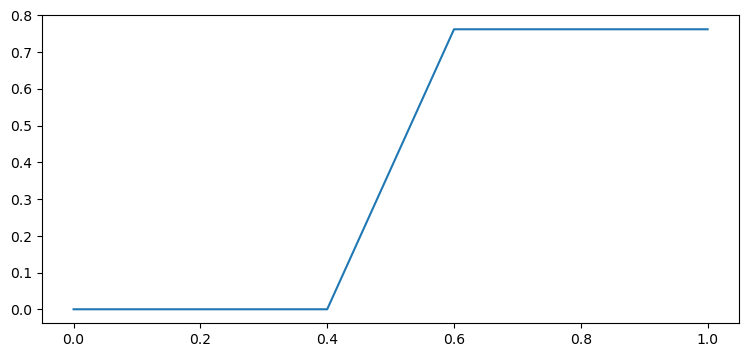

In [133]:
x_fir = np.linspace(0, T, len(movAvg_out))
x = np.linspace(0,T,1000)
#----------------------------------------------------------
plt.figure(figsize=(9, 4))
plt.plot(x_fir, movAvg_out, label='Moving average')
plt.plot(x,test(x), label='original')
plt.title('Moving average filtering', fontsize = 9)
plt.legend();
plt.grid()

#### Sawtooth

In [143]:
def sawtooth_test(x):
    f0 = 3 # Hz
    return 0.8* signal.sawtooth(2 * np.pi * f0 * x, 0.7)

In [144]:
t_inst, bins = amplitude_sampler(sawtooth_test,1, q)
time_vector= np.linspace(0,1,1000)
bins_h = q.qvalue(bins)

movAvg_out  = movingAvg(delta = 0.015, time=time_vector, transition_inst = t_inst, bins_heights = bins_h,Td = 0.08, K = 100, W = 5, T=T)

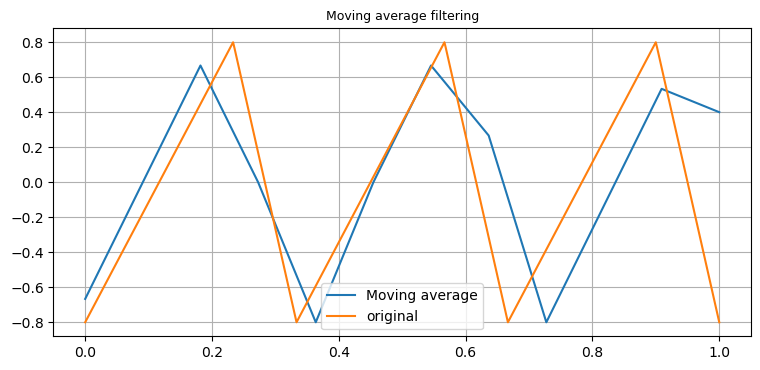

In [145]:
x_fir = np.linspace(0, T, len(movAvg_out))
x = np.linspace(0,T,1000)
#----------------------------------------------------------
plt.figure(figsize=(9, 4))
plt.plot(x_fir, movAvg_out, label='Moving average')
plt.plot(x,sawtooth_test(x), label='original')
plt.title('Moving average filtering', fontsize = 9)
plt.legend();
plt.grid()

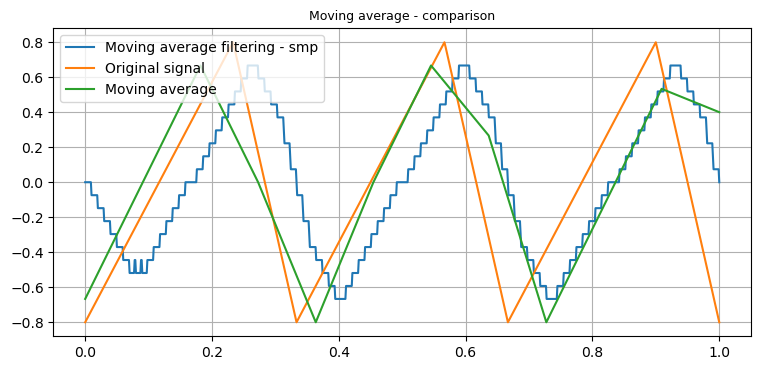

In [147]:
f = FIR_class(taps = 10, delay = 10)
y_fir_smp = f.movingAvg(x,q.quantize(sawtooth_test(x)))
#--------------------------------------------------------------------------
plt.figure(figsize=(9, 4))
plt.plot(x, y_fir_smp, label='Moving average filtering - smp')
plt.plot(x, sawtooth_test(x), label='Original signal')
plt.plot(x_fir, movAvg_out, label='Moving average')
plt.title('Moving average - comparison', fontsize=9)
plt.grid()
plt.legend();

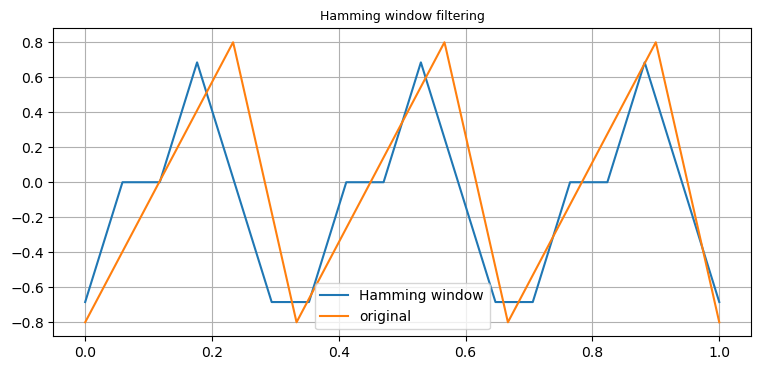

In [167]:
Hamming_out  = Hamming(delta = 0.0015, time=time_vector, transition_inst = t_inst, bins_heights = bins_h,Td = 0.055, K = 20, W = 3, T=T)
x_fir = np.linspace(0, T, len(Hamming_out))
x = np.linspace(0,T,1000)
#----------------------------------------------------------
plt.figure(figsize=(9, 4))
plt.plot(x_fir, Hamming_out, label='Hamming window')
plt.plot(x,sawtooth_test(x), label='original')
plt.title('Hamming window filtering', fontsize = 9)
plt.legend();
plt.grid()

0.12217172331256271


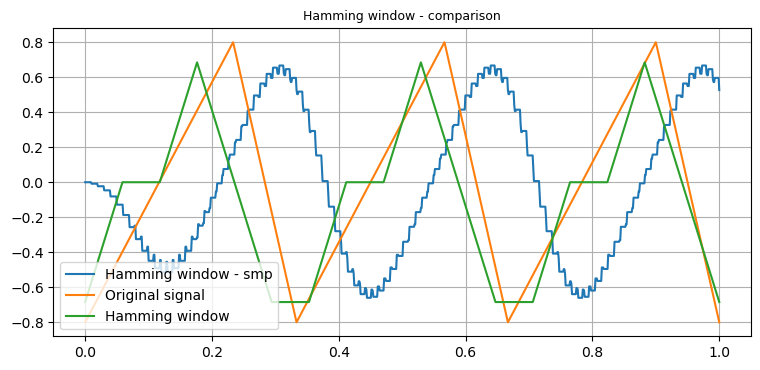

In [168]:
f = FIR_class(taps = 20, delay = 10)
y_fir_smp = f.hamming(x,q.quantize(sawtooth_test(x)))
#--------------------------------------------------------------------------
plt.figure(figsize=(9, 4))
plt.plot(x, y_fir_smp, label='Hamming window - smp')
plt.plot(x, sawtooth_test(x), label='Original signal')
plt.plot(x_fir, Hamming_out, label='Hamming window')
plt.title('Hamming window - comparison', fontsize=9)
plt.grid()
plt.legend();

ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

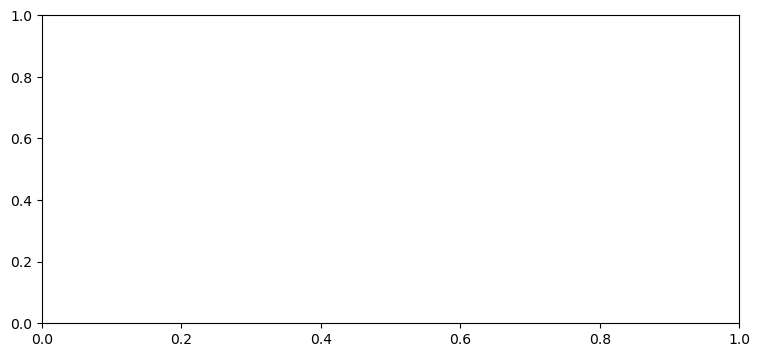

In [176]:
Bartlett_out  = Bartlett(delta = 0.03, time=time_vector, transition_inst = t_inst, bins_heights = bins_h,Td = 0.095, K = 20, W = 3, T=T)
x_fir = np.linspace(0, T, len(movAvg_out))
x = np.linspace(0,T,1000)
#----------------------------------------------------------
plt.figure(figsize=(9, 4))
plt.plot(x_fir[:-1], Bartlett_out, label='Bartlett triangular window')
plt.plot(x,sawtooth_test(x), label='original')
plt.title('Bartlett triangular window filtering', fontsize = 9)
plt.legend();
plt.grid()